**Contributors**: Yongbum Kim, Yeonwoo Kim, Seyeon Jeon

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

os.chdir('/content/drive/MyDrive/DSO530Public/Homework/03')

Mounted at /content/drive


In [ ]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

In [ ]:
# Set the figure width and height
fig_height = 6
fig_width = fig_height * 1.618
plt.rcParams['figure.figsize'] = (fig_width, fig_height)

# True or False

“True’ ’ implies the statement is always true, and statements are made in the context of this class. Provide a one sentence explanation for your answer.

## If $r_{X,Y}$ is zero, there is no relationship between $X$ and $Y$.

- Answer: False
- Explanation: A zero correlation coefficient ($r_{X,Y}$= 0) means there is no linear relationship between $X$ and $Y$, but it doesn't mean there is no relationship. There could still be a non-linear relationship.

## The residuals for a least squares line sum to zero.

- Answer: True
- Explanation: By definition of least squares regression, the sum of the residuals is always zero because the regression line minimizes the sum of squared residuals.

## The standard error for a predicted $Y_f$ associated with $X_f$ is greater than the standard error for the conditional expectation of $Y_f$ given $X_f$.

- Answer: True
- Explanation: The standard error for a predicted value includes both the variability of the conditional mean and the variability of individual observations around that mean, making it larger than the standard error for just the conditional expectation.

## Very large values of the least squares coefficients are statistically significant.

- Answer: False
- Explanation: Large coefficients do not necessarily imply statistical significance; Statistical significance depends on the standard error of the coefficient and corresponding p-value.

## $R^2$ is equal to the square of the sample correlation between the observed $Y$ and fitted $\hat{Y}$ values.

- Answer: True
- Explanation: In simple linear regression, $R^2$ means the square of the correlation coefficient between observed $Y$ and fitted $\hat{Y}$.

# Infant Nutrition

This question involves data from a study on the “nutrition of infants and preschool children in the north central region of the United States of America.” The data (in the file nutrition.csv) contains 72 observations of boys’ weight/height ratio (woh) for equally spaced values of age in months.

In [ ]:
# Load the data
nutrition = pd.read_csv("nutrition.csv")
nutrition.head()

,woh,age
0,0.46,0.5
1,0.47,1.5
2,0.56,2.5
3,0.61,3.5
4,0.61,4.5


## (a) Plot the data ($Y$ = woh), and overlay the least squares line and a 95% prediction interval in the range of the data. Comment on the goodness of fit.

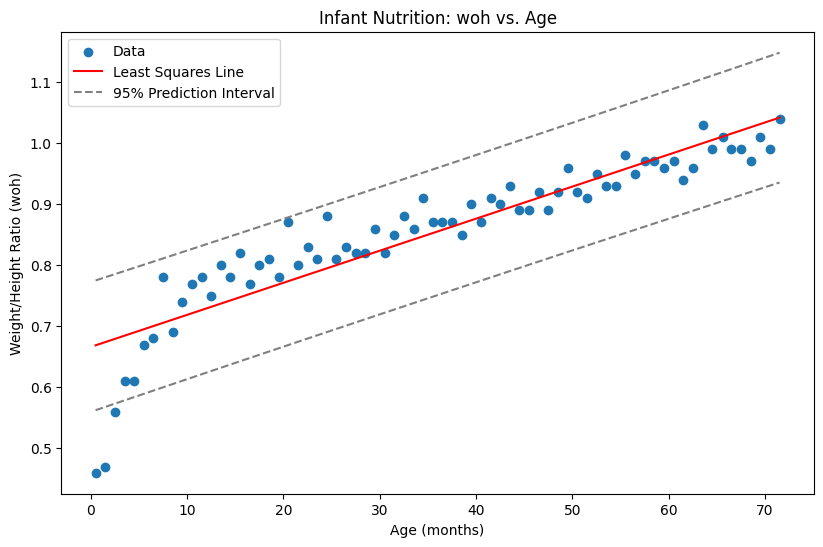

                            OLS Regression Results                            
Dep. Variable:                    woh   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     318.7
Date:                Sat, 15 Feb 2025   Prob (F-statistic):           9.15e-28
Time:                        21:34:49   Log-Likelihood:                 111.84
No. Observations:                  72   AIC:                            -219.7
Df Residuals:                      70   BIC:                            -215.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6661      0.012     54.440      0.0

In [ ]:
# Fit the linear regression model
model_a = smf.ols('woh ~ age', data=nutrition).fit()

# Create a scatter plot of the data
plt.scatter(nutrition['age'], nutrition['woh'], label='Data')

# Plot the least squares line
age_range = np.linspace(nutrition['age'].min(), nutrition['age'].max(), 100)
predicted_woh = model_a.predict(pd.DataFrame({'age': age_range}))
plt.plot(age_range, predicted_woh, color='red', label='Least Squares Line')

# Add 95% prediction interval
predictions_a = model_a.get_prediction(pd.DataFrame({'age': age_range}))
pred_intervals_a = predictions_a.summary_frame(alpha=0.05)
plt.plot(age_range, pred_intervals_a['obs_ci_lower'], color='gray', linestyle='--', label='95% Prediction Interval')
plt.plot(age_range, pred_intervals_a['obs_ci_upper'], color='gray', linestyle='--')

plt.xlabel('Age (months)')
plt.ylabel('Weight/Height Ratio (woh)')
plt.title('Infant Nutrition: woh vs. Age')
plt.legend()
plt.show()

print(model_a.summary())

1. **Goodness of Fit**:
  
  - The R-squared value is 0.820, indicating that the linear regression model explains 82% of the variation in the weight/height ratio (woh) based on age.
  - The adjusted R-squared value is 0.817, which is slightly lower but still high, confirming a good fit even after accounting for the number of predictors.

2. **Statistical Significance**:

  - The coefficients for both the intercept and age are statistically significant (p < 0.001), indicating a strong linear relationship between age and woh.
  - The slope coefficient for age is 0.0053, meaning that for every additional month of age, the weight/height ratio increases by approximately 0.0053 units.

3. **Prediction Interval**:
  
  - The plot includes a 95% prediction interval (dashed gray lines), showing the range within which future observations are likely to fall.
  - While the prediction interval captures most data points, it widens at the extremes, reflecting increased uncertainty in predictions as age moves away from the mean.

## (b) Plot the residuals from the above fit and comment on any patterns you see. Based on this plot, how would you change the model to better fit the data? Further justify your answer with a statistical test. Plot your updated regression and 95% prediction interval over a scatterplot of the data.

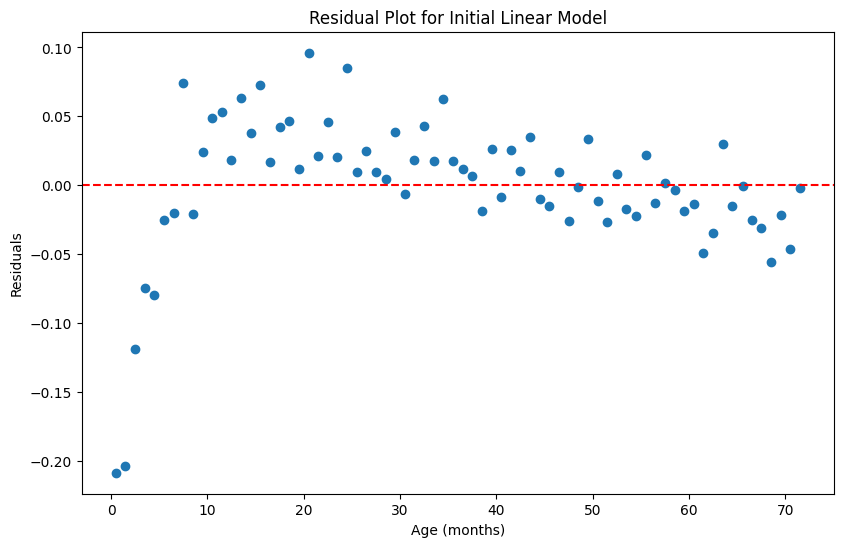

In [ ]:
# Calculate residuals
residuals_a = model_a.resid

# Plot residuals
plt.scatter(nutrition['age'], residuals_a)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Age (months)')
plt.ylabel('Residuals')
plt.title('Residual Plot for Initial Linear Model')
plt.show()

1. **Residual plot analysis**

  - Non-Linearity:
    - The residuals exhibit a clear curved pattern, deviating systematically above and below the horizontal line (residual = 0).
    - This indicates that the relationship between age and woh is not purely linear, violating the linearity assumption of regression.

  - Homoscedasticity:
    - The spread of residuals appears relatively consistent across all ages, suggesting no major issues with heteroscedasticity (constant variance).

  - Normality:
    - The residuals appear symmetric around zero, which is consistent with the assumption of normally distributed errors.








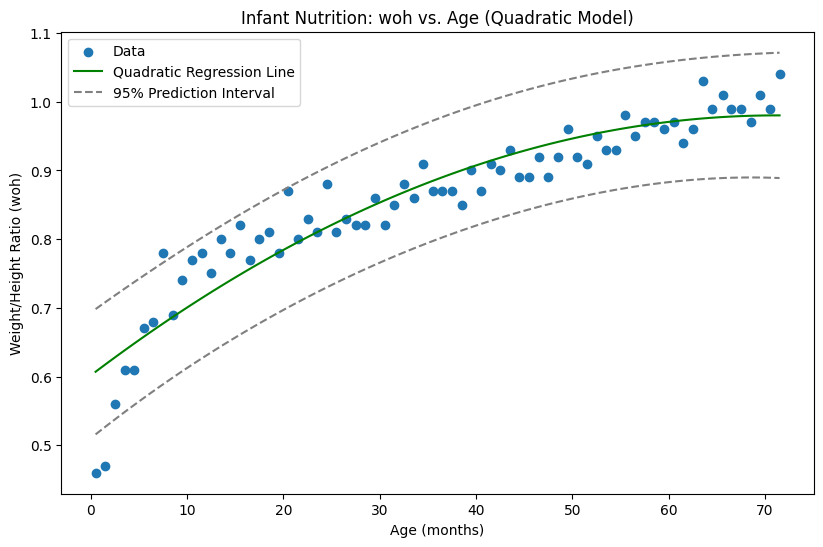

                            OLS Regression Results                            
Dep. Variable:                    woh   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     245.7
Date:                Sun, 16 Feb 2025   Prob (F-statistic):           4.14e-32
Time:                        02:49:49   Log-Likelihood:                 125.53
No. Observations:                  72   AIC:                            -245.1
Df Residuals:                      69   BIC:                            -238.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6017      0.015     39.355      

In [ ]:
# Justification for model change
# Eyeballing the residual plot, we can consider a quadratic model

# Fit the quadratic regression model
model_b = smf.ols('woh ~ age + I(age**2)', data=nutrition).fit()

# Plot the data and the quadratic regression line
plt.scatter(nutrition['age'], nutrition['woh'], label='Data')

# Plot the quadratic regression line
age_range = np.linspace(nutrition['age'].min(), nutrition['age'].max(), 100)
predicted_woh_b = model_b.predict(pd.DataFrame({'age': age_range, 'I(age**2)': age_range**2}))
plt.plot(age_range, predicted_woh_b, color='green', label='Quadratic Regression Line')

# Add 95% prediction interval for quadratic model
predictions_b = model_b.get_prediction(pd.DataFrame({'age': age_range, 'I(age**2)': age_range**2}))
pred_intervals_b = predictions_b.summary_frame(alpha=0.05)
plt.plot(age_range, pred_intervals_b['obs_ci_lower'], color='gray', linestyle='--', label='95% Prediction Interval')
plt.plot(age_range, pred_intervals_b['obs_ci_upper'], color='gray', linestyle='--')

plt.xlabel('Age (months)')
plt.ylabel('Weight/Height Ratio (woh)')
plt.title('Infant Nutrition: woh vs. Age (Quadratic Model)')
plt.legend()
plt.show()

print(model_b.summary())

In [ ]:
ssr1 = np.sum(model_a.resid**2)
ssr2 = np.sum(model_b.resid**2)
df1 = model_a.df_resid
df2 = model_b.df_resid
f = ((ssr1 - ssr2) / (df1 - df2)) / (ssr2 / df2)
p_value = 1 - stats.f.cdf(f, df1 - df2, df2)
print(f"SSR (Linear): {ssr1}")
print(f"SSR (Quadratic): {ssr2}")
print(f"F-statistic: {f}")
print(f"p-value: {p_value}")

SSR (Linear): 0.1886228720030825
SSR (Quadratic): 0.12895732609637875
F-statistic: 31.92469006751658
p-value: 3.318157657528076e-07


2. **Model Adjustment**: A quadratic term for age is added to better capture the non-linear relationship between age and woh.

3. **Updated Model: Quadratic Regression**
  - woh = $\beta_0$ + $\beta_1$⋅age + $\beta_2$⋅age$^2$ + $\epsilon$
    - The quadratic model includes both age and age$^2$ as predictors.
  - Both age and age$^2$ are statistically significant predictors (p < 0.001).
  - The R-squared value improves from 0.820 to 0.877, indicating that the quadratic model explains 87.7% of the variation in woh.

4. **Updated Plot: Quadratic Model**
  - The quadratic curve fits the data much better than the linear model, especially at younger ages.
  - The prediction interval captures most data points, confirming that the updated model provides a more accurate fit.

5. **Statistical Justification (F-Test)**: The F-test rejects the null hypothesis and confirms that adding the quadratic term significantly improves model fit (p < 0.001).
  - Null Hypothesis: The quadratic term ($\beta_2$) is not needed; a linear model is sufficient.
  - Alternative Hypothesis: The quadratic term ($\beta_2$) improves model fit.

## (c) Plot the residuals from new fit and compare to the plot in part (b).

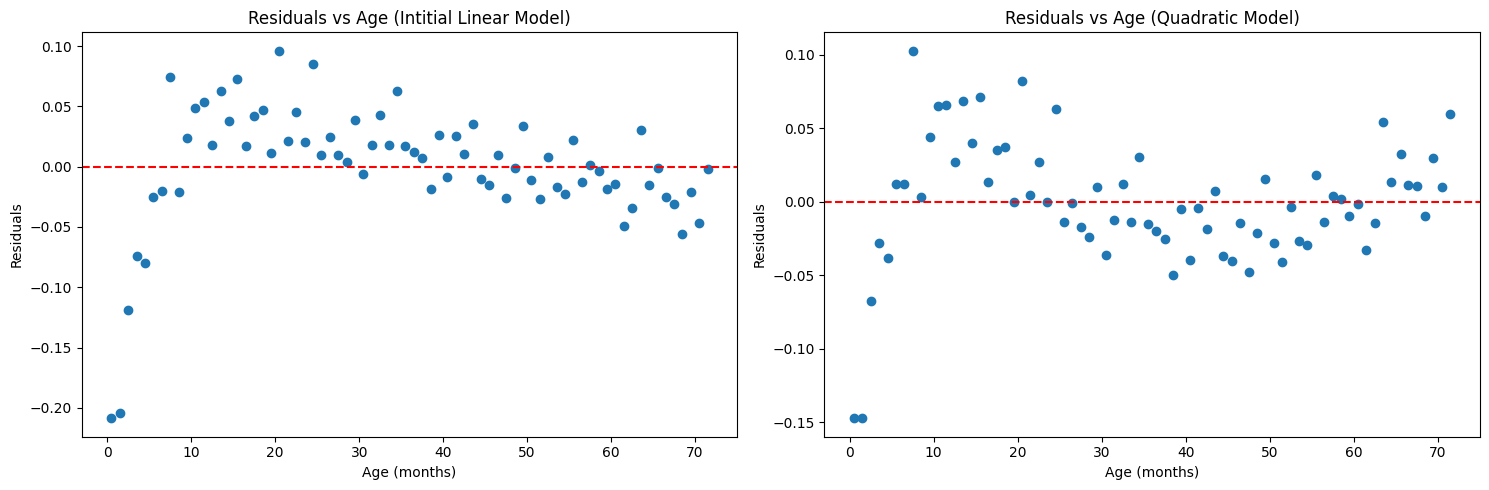

In [ ]:
# Calculate residuals for quadratic model
residuals_b = model_b.resid

# Plot residuals
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.scatter(nutrition['age'], residuals_a)
ax1.axhline(y=0, color='r', linestyle='--')
ax1.set_title('Residuals vs Age (Intitial Linear Model)')

ax2.scatter(nutrition['age'], residuals_b)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_title('Residuals vs Age (Quadratic Model)')

for ax in (ax1, ax2):
    ax.set_xlabel('Age (months)')
    ax.set_ylabel('Residuals')

plt.tight_layout()
plt.show()

1. **Residuals (Initial Linear Model)**: The residuals in the initial linear model show a distinct pattern. There appears to be a non-random distribution of residuals, particularly at lower ages. The residuals tend to be more negative for younger infants and then become more positive before scattered. This suggests that a linear model is not adequate to describe the relationship between age and woh.

2. **Residuals (Quadratic Model)**: The residuals in the quadratic model appear to be more randomly scattered around the zero line. While not perfect, the systematic pattern observed in the linear model's residuals is substantially reduced. Visually, the residuals in the quadratic model seem to have a slightly smaller magnitude overall, indicating that the quadratic model captures more of the variability in the data. This is a strong indicator that the quadratic model provides a better fit to the data than initial linear model.


## (d) The authors of the study have reason to believe that the observations fall into to groups: (1) the first seven boys and (2) the remaining 65. By introducing an appropriate dummy variable and interaction term, find the least squares fit of these lines. Plot them and their corresponding predictive intervals in such a way as they cover only their respective age ranges (i.e., so that they do not overlap). Include the simple linear regression and prediction interval from (a) in your plot. Comment on the differences you see.

                            OLS Regression Results                            
Dep. Variable:                    woh   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     597.6
Date:                Sat, 15 Feb 2025   Prob (F-statistic):           8.94e-49
Time:                        21:38:41   Log-Likelihood:                 169.26
No. Observations:                  72   AIC:                            -330.5
Df Residuals:                      68   BIC:                            -321.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7245      0.007    105.631      0.0

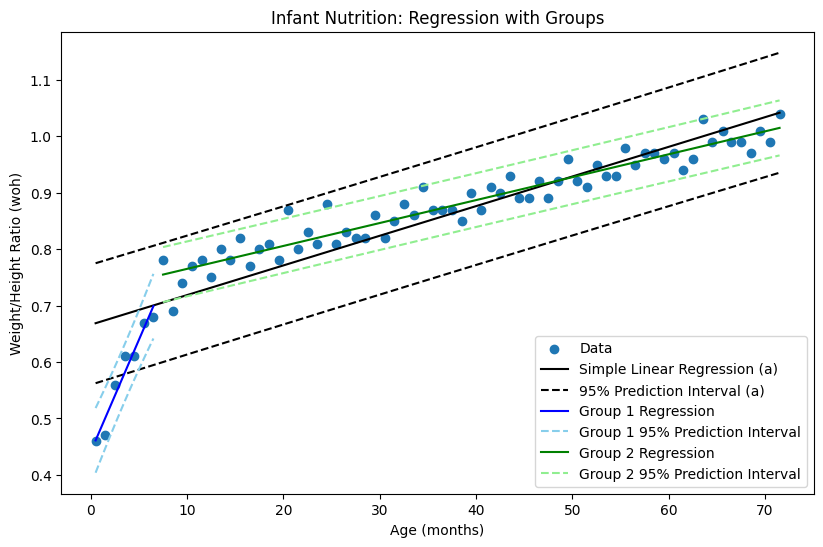

In [ ]:
# Include the simple linear regression and prediction interval from (a) in your plot.
nutrition['group'] = 0
nutrition.loc[0:6, 'group'] = 1 # create dummy variable

# Fit the regression model with dummy variable and interaction term
model_c = smf.ols('woh ~ age + group + age:group', data=nutrition).fit()
print(model_c.summary())

# Generate age ranges for each group
age_range_group1 = np.linspace(nutrition['age'].min(), nutrition['age'][6], 100)
age_range_group2 = np.linspace(nutrition['age'][7], nutrition['age'].max(), 100)

# Predict values for each group
predictions_group1 = model_c.predict(pd.DataFrame({'age': age_range_group1, 'group': 1, 'age:group': age_range_group1}))
predictions_group2 = model_c.predict(pd.DataFrame({'age': age_range_group2, 'group': 0, 'age:group': 0}))

# Get prediction intervals for each group
predictions_c_group1 = model_c.get_prediction(pd.DataFrame({'age': age_range_group1, 'group': 1, 'age:group': age_range_group1}))
pred_intervals_c_group1 = predictions_c_group1.summary_frame(alpha=0.05)

predictions_c_group2 = model_c.get_prediction(pd.DataFrame({'age': age_range_group2, 'group': 0, 'age:group': 0}))
pred_intervals_c_group2 = predictions_c_group2.summary_frame(alpha=0.05)

# Plot the data
plt.scatter(nutrition['age'], nutrition['woh'], label='Data')

# Plot the least squares line from part (a)
plt.plot(age_range, predicted_woh, color='black', linestyle='-', label='Simple Linear Regression (a)')
plt.plot(age_range, pred_intervals_a['obs_ci_lower'], color='black', linestyle='--', label='95% Prediction Interval (a)')
plt.plot(age_range, pred_intervals_a['obs_ci_upper'], color='black', linestyle='--')

# Plot the regression lines and prediction intervals for each group
plt.plot(age_range_group1, predictions_group1, color='blue', label='Group 1 Regression')
plt.plot(age_range_group1, pred_intervals_c_group1['obs_ci_lower'], color='skyblue', linestyle='--', label='Group 1 95% Prediction Interval')
plt.plot(age_range_group1, pred_intervals_c_group1['obs_ci_upper'], color='skyblue', linestyle='--')

plt.plot(age_range_group2, predictions_group2, color='green', label='Group 2 Regression')
plt.plot(age_range_group2, pred_intervals_c_group2['obs_ci_lower'], color='lightgreen', linestyle='--', label='Group 2 95% Prediction Interval')
plt.plot(age_range_group2, pred_intervals_c_group2['obs_ci_upper'], color='lightgreen', linestyle='--')

plt.xlabel('Age (months)')
plt.ylabel('Weight/Height Ratio (woh)')
plt.title('Infant Nutrition: Regression with Groups')
plt.legend()
plt.show()

The group-specific regression model provides a much better fit to the data by accounting for differences in growth patterns between groups.

1. **Simple Linear Regression (Black Line and Interval)**:
  - **Relationship**: The simple linear regression line assumes a single relationship between age and woh for all observations.
    - Group 1 (first seven boys): Rapid increase in woh with age.
    - Group 2 (remaining 65 boys): Slower, more gradual increase in woh with age.
  - **PI**: The simple linear regression's prediction interval is wider because it attempts to account for all observations under a single model.

2. **Group-Specific Regression Lines**:
  - **Relationship**: The group-specific regression model introduces a dummy variable (group) and an interaction term (age:group) to allow for different slopes and intercepts for each group.
    - Group 1 (Blue Line):
      - Steeper slope due to the significant positive interaction term (age:group = 0.0356).
      - Indicates a faster rate of increase in woh with age for the first seven boys.
    - Group 2 (Green Line):
      - Shallower slope, reflecting a slower rate of increase in woh with age for the remaining boys.
  - **PI**: The prediction intervals for the group-specific lines are narrower than those for the simple linear regression model, reflecting reduced uncertainty when modeling each group separately.

3. **Model Fit**:
  - The group-specific regression model achieves a much higher R² value (0.963) compared to the simple linear regression (0.820), indicating a significantly better fit to the data.
  - This improvement is due to the ability of the group-specific model to capture differences in growth patterns between the two groups.

## (e) Plot the residuals from new fit and compare to the plot in parts (b) and (c).

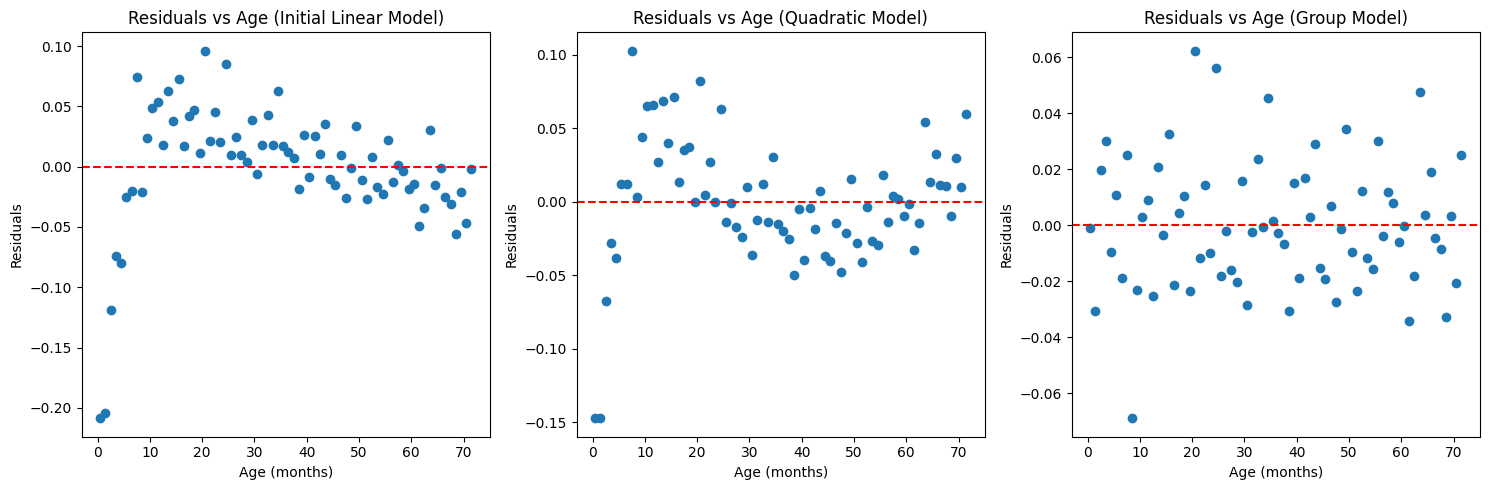

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(nutrition['age'], residuals_a)
ax1.axhline(y=0, color='r', linestyle='--')
ax1.set_title('Residuals vs Age (Initial Linear Model)')

ax2.scatter(nutrition['age'], residuals_b)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_title('Residuals vs Age (Quadratic Model)')

ax3.scatter(nutrition['age'], residuals_c)
ax3.axhline(y=0, color='r', linestyle='--')
ax3.set_title('Residuals vs Age (Group Model)')

for ax in (ax1, ax2, ax3):
    ax.set_xlabel('Age (months)')
    ax.set_ylabel('Residuals')

plt.tight_layout()
plt.show()

1. **Initial Linear Model**:
  - Clear Pattern: The residuals display a distinct, non-random pattern. There's a tendency for the residuals to be negative at lower ages, then become positive in the middle ages, and then scatter around zero at higher ages.
  - Violation of Linearity: This pattern strongly indicates that the linear model is not capturing the true relationship between age and the weight/height ratio (woh). It violates the assumption of linearity.

2. **Quadratic Model**:
  - Improved Randomness: The residuals in this plot are more randomly scattered around the zero line compared to the linear model.
  - Reduced Pattern: The systematic pattern seen in the linear model's residuals is considerably reduced.
  - Some Remaining Structure: However, there might still be some subtle pattern, especially at the extreme ages, but the improvement compared to the linear model is significant.

3. **Group Model**:
  - Most Random: This plot exhibits the most random scatter of residuals around the zero line among the three models.
  - Reduced Magnitude: The magnitude of the residuals (the vertical spread of the points) appears to be smaller than in the linear and quadratic model plots, which means this model fits the data better.
  - Addresses Group Differences: This model directly addresses the hypothesis that the relationship between age and weight/height ratio differs between the first seven boys and the remaining 65.

(f) Of the three, which model do you prefer? Why?

The group model is preferred because:

1. **Initial Linear Model**
  - Residual Plot: The residuals show a clear non-linear pattern (curvature), deviating systematically from the horizontal line at zero. This indicates that the linear model fails to capture the relationship between age and woh.
  - Goodness of Fit: The R² value for this model is 0.820, meaning it explains 82% of the variability in woh.
  - Conclusion: The linear model is inadequate due to the non-linear pattern in residuals, suggesting that a more complex model is needed.

2. **Quadratic Model**
  - Residual Plot: The residuals are more evenly distributed around zero compared to the linear model, with no obvious curvature. However, there are still some slight patterns, particularly at the extremes of age, indicating that the quadratic model may not fully capture the relationship.
  - Goodness of Fit: The R² value improves to 0.877, showing that the quadratic model explains more variability in woh than the linear model.
  - Conclusion: The quadratic model provides a much better fit than the linear model, but it may still oversimplify differences between groups.

3. **Group Model**
  - Residual Plot: The residuals appear randomly scattered around zero without obvious patterns or systematic deviations, satisfying key regression assumptions. This indicates that the group model captures the relationship between age and woh more effectively than the other two models.
  - Goodness of Fit: The R² value is 0.963, significantly higher than both the linear and quadratic models, indicating that this model explains nearly all variability in woh.
  - Conclusion: The group model provides the best fit among the three models, as it accounts for differences in growth patterns between groups.

# Beef — It’s What’s for Dinner

In 1988, US cattle producers voted on whether or not to each pay a dollar per head towards the marketing campaigns of the American Beef Council. At the time of this vote, the council’s TV campaign featured a voice-over by actor Robert Mitchum, using the theme “Beef — it’s what’s for dinner.” To understand the vote results (it passed), the Montana state cattlemen’s association looked at the effect of the physical size of the farm and the value of the farms’ gross revenue on voter preference.

The data (in the file beef.csv) consist of the vote results (% YES), average SIZE of farm (hundreds of acres), and average VAL of products sold annually by each farm (in $ thousands) for each of Montana’s 56 counties.

In [ ]:
# Load the data
beef = pd.read_csv("beef.csv")
beef.head()

,YES,SIZE,VAL
0,85.9,45.2,122
1,65.0,58.5,121
2,74.9,52.5,81
3,72.5,24.0,74
4,76.6,10.5,54


## (a) Plot the data and comment on what you see. How will this effect our analysis?

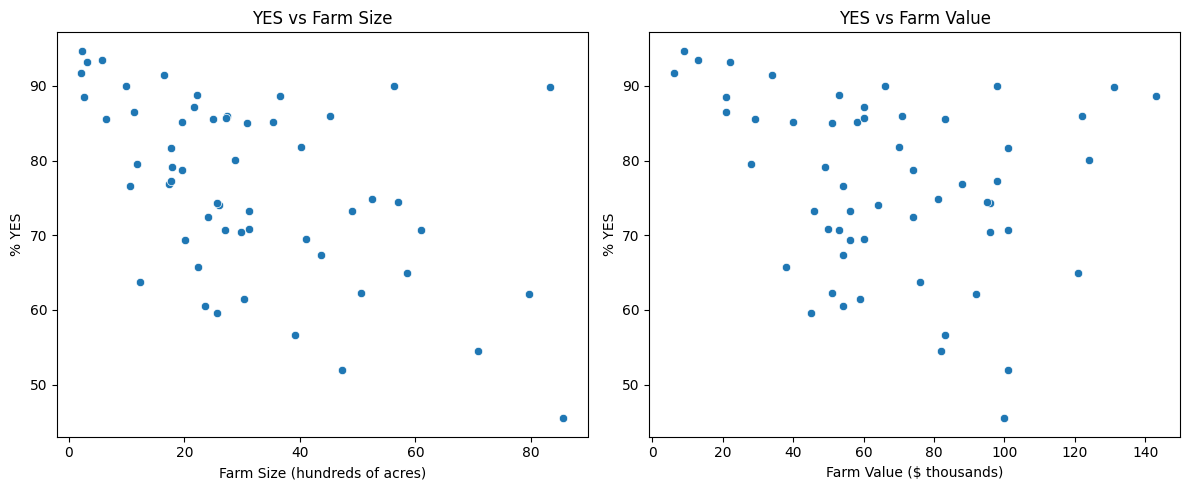

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='SIZE', y='YES', data=beef, ax=ax1)
ax1.set_title('YES vs Farm Size')
ax1.set_xlabel('Farm Size (hundreds of acres)')
ax1.set_ylabel('% YES')

sns.scatterplot(x='VAL', y='YES', data=beef, ax=ax2)
ax2.set_title('YES vs Farm Value')
ax2.set_xlabel('Farm Value ($ thousands)')
ax2.set_ylabel('% YES')

plt.tight_layout()
plt.show()

**[Comments]**
1. YES Votes (%) vs. Farm Size:
  - There appears to be a negative trend: as farm size increases, the percentage of YES votes tends to decrease.
  - However, the relationship is not perfectly linear, as there is considerable scatter in the data.
  - Smaller farms generally exhibit higher percentages of YES votes, while larger farms show more variability.
2. YES Votes (%) vs. Farm Value:
  - There seems to be a positive trend: as farm value increases, the percentage of YES votes also tends to increase.
  Similar to the first plot, there is substantial variability in YES votes for farms with similar values, especially at lower farm values.

**[Effects]**
- Relationship: The scatter plots suggest that both farm size and farm value are related to the percentage of YES votes as a negative relationship with farm size and a positive relationship with farm value are evident. However, the relationships are not perfectly linear.
- Variability: The high variability in YES votes for similar values of SIZE or VAL indicates that other factors may influence voting behavior. This variability may reduce the explanatory power of simple linear regression models.
- Non-linearity: The relationships may not be strictly linear, particularly for farm value (VAL), where a log transformation might better capture the diminishing returns at higher values.
- Multicollinearity: If SIZE and VAL are correlated, multicollinearity could inflate standard errors in a multiple regression model, making it difficult to interpret individual coefficients.

## (b) Fit a regression model for YES with both SIZE and log(VAL) as covariates. Interpret the results. What regression assumptions might we have violated here?

In [ ]:
beef['logVAL'] = np.log(beef['VAL'])
model_beef_b = smf.ols('YES ~ SIZE + logVAL', data=beef).fit()
print(model_beef_b.summary())

                            OLS Regression Results                            
Dep. Variable:                    YES   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     9.342
Date:                Sun, 16 Feb 2025   Prob (F-statistic):           0.000335
Time:                        00:57:23   Log-Likelihood:                -208.83
No. Observations:                  56   AIC:                             423.7
Df Residuals:                      53   BIC:                             429.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     93.7144      9.950      9.418      0.0

Key assumptions of our linear regression model:
1. The conditional mean of Y is linear in X.
2. The additive errors (deviations from line)
  - are Normally distributed
  - independent from each other
  - identically distributed (i.e., they have constant variance)

**[Violations]**
- **Omitted Variable Bias**: The R-squared value is 0.261, indicating that the model explains approximately 26.1% of the variation in the percentage of YES votes. This suggests that other important predictors may be missing from the model, leading to underfitting.
- **Non-linearity**: The relationship between YES and the predictors (SIZE and log(VAL)) is assumed to be linear in this model. However, if the scatterplots of YES vs. SIZE or YES vs. log(VAL) show non-linear patterns, this assumption could be violated.
  - Significant Relationship Between SIZE and YES: The coefficient for SIZE is statistically significant with a negative relationship (−0.2428). This suggests that larger farm sizes are associated with lower percentages of YES votes.
  - No Significant Relationship Between log(VAL) and YES: The coefficient for log(VAL) is not statistically significant, implying that farm value (in log scale) does not have a significant effect on YES votes in this model.
- **Multicollinearity**: Multicollinearity occurs when predictors are highly correlated with each other, leading to inflated standard errors for the coefficients.
  - The standard error for log(VAL) is quite large (2.792), and its p-value (0.397) indicates insignificance despite a relatively large coefficient (-2.3861). This could suggest multicollinearity between SIZE and log(VAL).

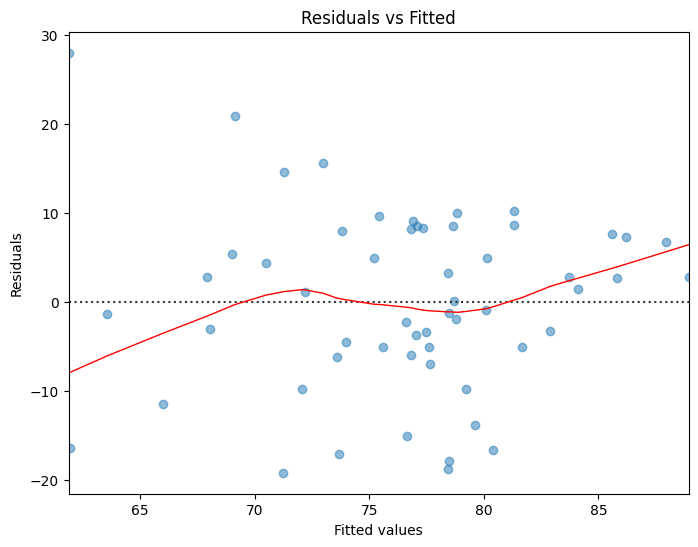

In [ ]:
# Residual plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.residplot(x=model_beef_b.predict(), y=model_beef_b.resid, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'r', 'lw': 1}, ax=ax)
ax.set_title('Residuals vs Fitted')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
plt.show()

## (c) Find a better model: does the effect of SIZE change depending on log(VAL)? What is your estimate of the effect on YES of a unit change in SIZE? Interpret your conclusion.

In [ ]:
model_beef_c = smf.ols('YES ~ SIZE + logVAL + SIZE:logVAL', data=beef).fit()
print(model_beef_c.summary())

# Calculate and interpret the effect of SIZE
val_mean = np.log(beef['VAL']).mean()
size_effect = model_beef_c.params['SIZE'] + model_beef_c.params['SIZE:logVAL'] * val_mean
print(f"Effect of SIZE at mean log(VAL): {size_effect}")

                            OLS Regression Results                            
Dep. Variable:                    YES   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     10.31
Date:                Sun, 16 Feb 2025   Prob (F-statistic):           1.97e-05
Time:                        01:01:15   Log-Likelihood:                -204.22
No. Observations:                  56   AIC:                             416.4
Df Residuals:                      52   BIC:                             424.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     110.0054     10.681     10.299      

1. **Effect of SIZE change depending on log(VAL)**:

  - The effect of SIZE on YES changes depending on the value of log(VAL). This is evident from the significant interaction term (SIZE:logVAL), which has a coefficient of 0.4096 with a p-value of 0.004. This indicates that the relationship between SIZE and YES is moderated by log(VAL).
  - The effect of SIZE on YES becomes less negative as log(VAL) increases.

2. **Estimate of the effect on YES of a unit change in SIZE**:

  Effect of SIZE = −2.1046 + 0.4096⋅log VAL

  This demonstrates that as larger farms are more likely to vote YES, but as farm value increases, the negative impact of farm size on YES votes becomes less pronounced.

  -  When log(VAL) = 0:
    - Effect of SIZE = −2.1046 + 0.4096⋅0 = −2.1046
    - This means that for small values of farm value (log scale), an increase in farm size reduces the percentage of YES votes by approximately 2.1%.

  - When log(VAL) = 5:
    - Effect of SIZE = −2.1046 + 0.4096⋅5 = −0.0566
    - For larger farm values (log scale), the negative effect of farm size diminishes significantly, reducing YES votes by only about 0.06%.

# Crime Statistics

In this question, we consider crime-related and demographic statistics for 47 US states in 1960, available as crime.csv on Brightspace, and via:

http://lib.stat.cmu.edu/DASL/Datafiles/USCrime.html

The data were collected from the FBI’s Uniform Crime Report and other government agencies to determine how the Crime Rate (CR, offenses per million population) depends on thirteen socio-economic variables. For a full description, see the web page quoted above.

We shall focus on a subset including residents’ average years of education (Ed), labor force participation (LF), and median income (W).

In [ ]:
# Load the data
crime = pd.read_csv("crime.csv")
crime.head()

,CR,Age,S,Ed,Ex0,Ex1,LF,M,N,NW,U1,U2,W,X
0,79.1,151,1,91,58,56,510,950,33,301,108,41,394,261
1,163.5,143,0,113,103,95,583,1012,13,102,96,36,557,194
2,57.8,142,1,89,45,44,533,969,18,219,94,33,318,250
3,196.9,136,0,121,149,141,577,994,157,80,102,39,673,167
4,123.4,141,0,121,109,101,591,985,18,30,91,20,578,174


## (a) Present a visual summary of the data. How does the crime rate relate to these three potential explanatory variables?

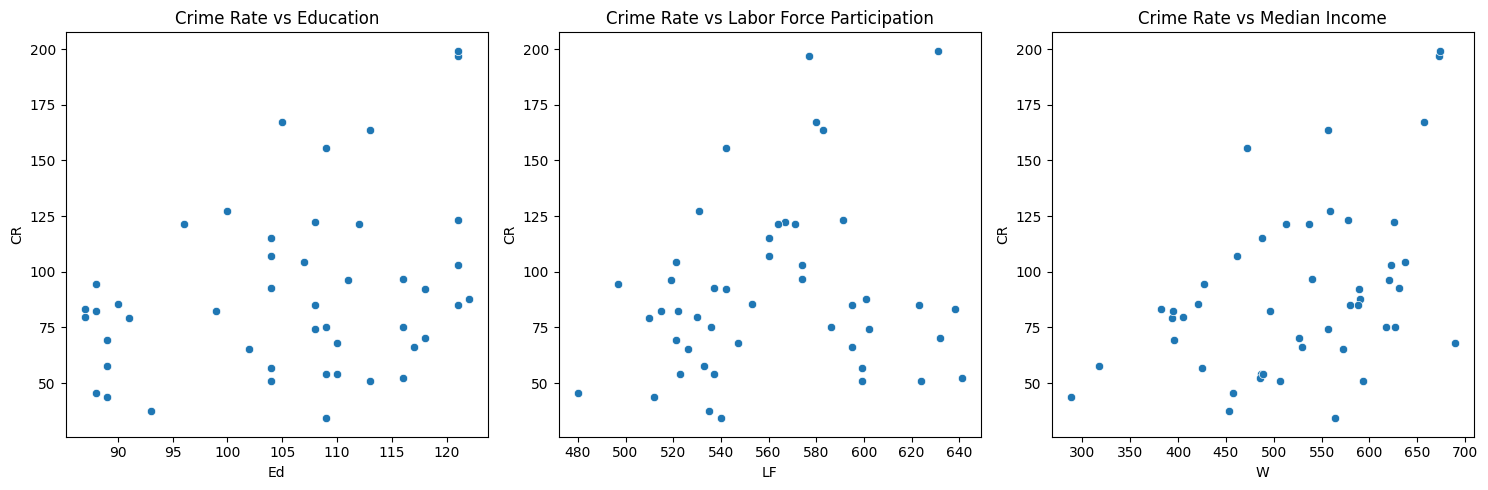

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Ed: average years of education
sns.scatterplot(data=crime, x="Ed", y="CR", ax=axes[0])
axes[0].set_title("Crime Rate vs Education")

# LF: labor force participation
sns.scatterplot(data=crime, x="LF", y="CR", ax=axes[1])
axes[1].set_title("Crime Rate vs Labor Force Participation")

# W: median income
sns.scatterplot(data=crime, x="W", y="CR", ax=axes[2])
axes[2].set_title("Crime Rate vs Median Income")

plt.tight_layout()
plt.show()

1. **Crime Rate vs Education (Ed)**:
  - The scatter plot shows no clear linear relationship between crime rate and education.
  - The points are widely scattered, with no obvious trend indicating that higher or lower education levels are strongly associated with crime rates.
  - Education may not have a strong direct effect on crime rates in this dataset, or the relationship could be influenced by other unobserved factors.

2. **Crime Rate vs Labor Force Participation (LF)**:
  - The scatter plot shows a weak positive trend between labor force participation and crime rate, but the relationship is not strong.
  - There is substantial variability in crime rates for similar levels of labor force participation, suggesting other factors may be influencing crime rates.- While there might be a slight positive association, it is unlikely to be a dominant factor in explaining variations in crime rates.

3. **Crime Rate vs Median Income (W)**:
  - The scatter plot shows a clearer positive trend compared to the other two variables. As median income increases, the crime rate tends to increase as well.
  - However, there is still significant variability, indicating that while income might play a role, it is not the sole determinant of crime rates.
  - Median income appears to have the strongest relationship with crime rate among the three variables, suggesting that economic factors may influence criminal activity.

## (b) Consider the regression of crime rate onto each of the three explanatory variables (Ed, LF, and W), individually in turn. Do you find any significant relationships? Any which are surprising?

In [ ]:
# Crime - Ed
model_crime_Ed = smf.ols('CR ~ Ed', data=crime).fit()
print(model_crime_Ed.summary())

# Crime - LF
model_crime_LF = smf.ols('CR ~ LF', data=crime).fit()
print(model_crime_LF.summary())

# Crime - W
model_crime_W = smf.ols('CR ~ W', data=crime).fit()
print(model_crime_W.summary())

                            OLS Regression Results                            
Dep. Variable:                     CR   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     5.236
Date:                Sun, 16 Feb 2025   Prob (F-statistic):             0.0269
Time:                        02:00:35   Log-Likelihood:                -235.39
No. Observations:                  47   AIC:                             474.8
Df Residuals:                      45   BIC:                             478.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.3967     51.810     -0.529      0.6

1. **Crime Rate vs Education (Ed)**: A positive relationship between education and crime rate is counterintuitive, as higher education levels are typically associated with lower crime rates. This could indicate omitted variable bias or other confounding factors.

  - The coefficient indicates that for every additional year of education, the crime rate increases by approximately 1.116 offenses per million population.
  - The p-value is statistically significant (p=0.027 < 0.05), suggesting a significant positive relationship between education and crime rate.
  - However, the R-squared value is low (0.104), meaning that education explains only a small portion of the variability in crime rates.

2. **Crime Rate vs Labor Force Participation (LF)**: There is no significant relationship between labor force participation and crime rate based on this model.

  - The coefficient suggests that a one-unit increase in labor force participation is associated with an increase in crime rate by approximately 0.1808 offenses per million population.
  - The p-value is not statistically significant (0.204 > 0.055),indicating no strong evidence of a relationship between labor force participation and crime rate.
  - The R-squared value is very low (0.036), meaning labor force participation explains almost none of the variability in crime rates.

3. **Crime Rate vs Median Income (W)**: Similar to education, a positive relationship between median income and crime rate is unexpected, as higher income levels are generally associated with lower crime rates.

  - The coefficient indicates that for every $1,000 increase in median income, the crime rate increases by approximately 0.1769 offenses per million population.
  - The p-value is statistically significant (p=0.002 < 0.05), suggesting a strong positive relationship between median income and crime rate.
  - The R-squared value is higher than for the other two variables (0.195), but it still indicates that median income explains only a small portion of the variability in crime rates.

## (c) A continental US state not in our sample had a median income of $2750 in 1960 (i.e., W = 275), but the crime rate recordings were not considered accurate enough for inclusion. What is a 90% prediction interval for the unknown crime rate in this state? Is there anything disturbing about this interval?

In [ ]:
W_unknown = 275
new_data = pd.DataFrame({'W': [W_unknown]})
prediction_W = model_crime_W.get_prediction(new_data)
pi = prediction_W.conf_int(alpha=0.1)
print(f"\n90% Prediction Interval for W = 275: {pi}")


90% Prediction Interval for W = 275: [[22.08786861 70.34696925]]


**[Key observations]**

Predicted Crime Rate (The fitted regression line predicts the crime rate (CR) based on W using the equation):

CR = −2.4283 + 0.1769⋅W

Substituting W = 275:

CR = −2.4283 + 0.1769⋅275 = 46.4952

1. Expected Crime Rate: The model predicts that the crime rate for a state with
W = 275 is approximately 46.5 offenses per million population.
2. Range of Likely Values: The prediction interval suggests that the actual crime rate could reasonably fall between 22.09 and 70.35 offenses per million population with 90% confidence.

**[Anything disturbing]**
1. Wide range: The wide interval reflects a high level of uncertainty in the model's predictions, which could be due to:
  - A low R-squared value (0.195), meaning that only about 19.5% of the variation in crime rates is explained by median income.
  - High variability in crime rates that cannot be accounted for by median income a sole predictor for crime rates.
2. Omitted variables: Other important factors influencing crime rates (e.g., urbanization, poverty levels, law enforcement presence) are not included in this model, potentially leading to omitted variable bias.


## (d) Consider now the MLR of crime rate onto all of the three explanatory variables (Ed, LF, and W. Compare your results to what you found in (b). Explain any differences/similarities you find.

In [ ]:
model_mlr = smf.ols('CR ~ Ed + LF + W', data=crime).fit()
print("\nMultiple Linear Regression Results:")
print(model_mlr.summary())


Multiple Linear Regression Results:
                            OLS Regression Results                            
Dep. Variable:                     CR   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     3.591
Date:                Sat, 15 Feb 2025   Prob (F-statistic):             0.0211
Time:                        23:47:16   Log-Likelihood:                -232.73
No. Observations:                  47   AIC:                             473.5
Df Residuals:                      43   BIC:                             480.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -3

1. **Significance of Predictors**:
  - In part (b), both Ed and W were significant predictors individually. In MLR, only W remains significant, while Ed becomes insignificant due to multicollinearity or shared variance with other predictors.
        - Crime Rate vs Education (Ed): In (b), there is a positive and significant relationship with CR, but in MLR, there is negative and insignificant relationship.
        - Crime Rate vs Labor Force Participation (LF): In (b), there is an insignificant relationship with CR. In MLR, there is still an insignificant relationship.
        - Crime Rate vs Median Income (W): In (b), there is a positive and significant relationship with CR. In MLR, there is still a positive and significant, but with a slightly reduced coefficient.

2. **Model Fit**: The R-squared values in part (b) were lower for individual regressions compared to the MLR model, which explains more variance by combining all three predictors.

3. **Multicollinearity**: The condition number in the MLR output is large (11,000+), indicating potential multicollinearity among predictors. This could explain why Ed's significance disappears in MLR despite being significant in its individual regression.

## (e) Now consider the variable S, an indicator if the state is in the South (0 = No, 1 = Yes). Add interactions of S with each of Ed and W to your model. Compute the partial effects of Ed and W on crime in the southern and northern states. Give a confidence interval for each partial effect. (That’s four partial effects total: two for northern states, two for southern states.) Interpret and discuss both the values of the four partial effects and their intervals/significance. To form the confidence intervals, you can follow the steps given in the Python Tutorial on Linear regression.

In [ ]:
interaction_model = smf.ols("CR ~ Ed + W + S + Ed:S + W:S + LF", data=crime).fit()
print("\nInteraction Model Results:")
print(interaction_model.summary().tables[1])


Interaction Model Results:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -228.3198    106.127     -2.151      0.038    -442.810     -13.830
Ed            -0.0111      0.910     -0.012      0.990      -1.850       1.827
W              0.3782      0.099      3.830      0.000       0.179       0.578
S              3.9576    137.324      0.029      0.977    -273.585     281.501
Ed:S           2.3635      1.728      1.368      0.179      -1.129       5.856
W:S           -0.4063      0.173     -2.348      0.024      -0.756      -0.057
LF             0.1864      0.154      1.213      0.232      -0.124       0.497


In [ ]:
# Calculate partial effects and confidence intervals
def partial_effect_ci(model, var, s_value):
  coef = model.params[var] + model.params[f"{var}:S"] * s_value
  se = np.sqrt(model.cov_params().loc[var, var] + s_value**2 * model.cov_params().loc[f"{var}:S", f"{var}:S"] + 2 * s_value * model.cov_params().loc[var, f"{var}:S"])
  ci = stats.t.interval(0.95, model.df_resid, loc=coef, scale=se)
  return coef, ci

variables = ["Ed", "W"]
regions = ["Northern", "Southern"]

for var in variables:
  for i, region in enumerate(regions):
    effect, ci = partial_effect_ci(interaction_model, var, i)
    print(f"\nPartial effect of {var} in {region} states:")
    print(f"Effect: {effect:.4f}")
    print(f"95% CI: ({ci[0]:.4f}, {ci[1]:.4f})")


Partial effect of Ed in Northern states:
Effect: -0.0111
95% CI: (-1.8497, 1.8275)

Partial effect of Ed in Southern states:
Effect: 2.3524
95% CI: (-0.7196, 5.4244)

Partial effect of W in Northern states:
Effect: 0.3782
95% CI: (0.1786, 0.5778)

Partial effect of W in Southern states:
Effect: -0.0281
95% CI: (-0.3197, 0.2636)


**[Key observations]**
1. Northern States:
  - Education has no significant impact on crime rates, as the confidence interval includes zero.
  - Median income has a strong positive impact on crime rates, as the confidence interval does not include zero. This suggests that higher incomes are associated with higher crime rates in these states.

2. Southern States:
  - Education shows a positive but insignificant relationship with crime rates, as the confidence interval includes zero.
  - Median income has no significant impact on crime rates, as the confidence interval includes zero.

**[Interpretation]**
1. The statistically significant positive relationship between median income and crime rate in Northern states is not observed in Southern states.
  - In Northern states, median income is a significant predictor of crime rates.
  - In Southern states, neither education nor median income significantly impacts crime rates.
2. The lack of significance for education in both regions indicates that other factors may be more influential in determining crime rates.

# Regression Residuals and Transformations

The file transforms.csv contains 4 pairs of $X_s$ and $Y_s$.

In [ ]:
# Load the data
transforms = pd.read_csv("transforms.csv")
transforms.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4
0,0.044799,0.788997,-2.697259,-9.004791,0.402045,9.101905,0.518673,0.712829
1,0.369676,0.568284,-1.542823,-1.568273,0.715170,4.886606,2.064758,65.835770
2,0.953484,0.170307,-1.917208,-3.850695,0.420926,7.604894,0.681946,3.555092
3,0.650204,0.159461,-0.085285,3.806207,0.319308,9.507035,0.239875,1.082107
4,0.519371,0.264427,-2.575511,-7.781956,0.929802,2.838182,23.232918,14720.054197


In [ ]:
# Function to plot regression results
def plot_regression(x, y, title):
  plt.figure(figsize=(10, 6))
  plt.scatter(x, y, alpha=0.7)

  # Fit regression line
  X = sm.add_constant(x)
  model = sm.OLS(y, X).fit()
  y_pred = model.predict(X)

  plt.plot(x, y_pred, color='red', linewidth=2)
  plt.title(title)
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.show()

# Function to plot residual diagnostics
def plot_residuals(model, x, title):
  residuals = model.resid
  studentized_residuals = model.get_influence().resid_studentized_external

  fig, axes = plt.subplots(1, 3, figsize=(18, 5))

  # Residual scatterplot
  axes[0].scatter(x, studentized_residuals, alpha=0.7)
  axes[0].axhline(y=0, color='red', linestyle='--')
  axes[0].set_title(f'{title} - Residual Scatterplot')
  axes[0].set_xlabel('X')
  axes[0].set_ylabel('Studentized Residuals')

  # Normal Q-Q plot
  sm.qqplot(studentized_residuals, line='45', ax=axes[1])
  axes[1].set_title(f'{title} - Normal Q-Q Plot')

  # Histogram
  axes[2].hist(studentized_residuals, bins=20, edgecolor='black')
  axes[2].set_title(f'{title} - Histogram of Residuals')
  axes[2].set_xlabel('Studentized Residuals')

  plt.tight_layout()
  plt.show()

For each pair:

## (a) Fit the linear regression model $Y = \beta_0 + \beta_1 X + \varepsilon, \, \varepsilon \sim N(0, \sigma^2)$. Plot the data and fitted line.


Analysis for X1 and Y1:


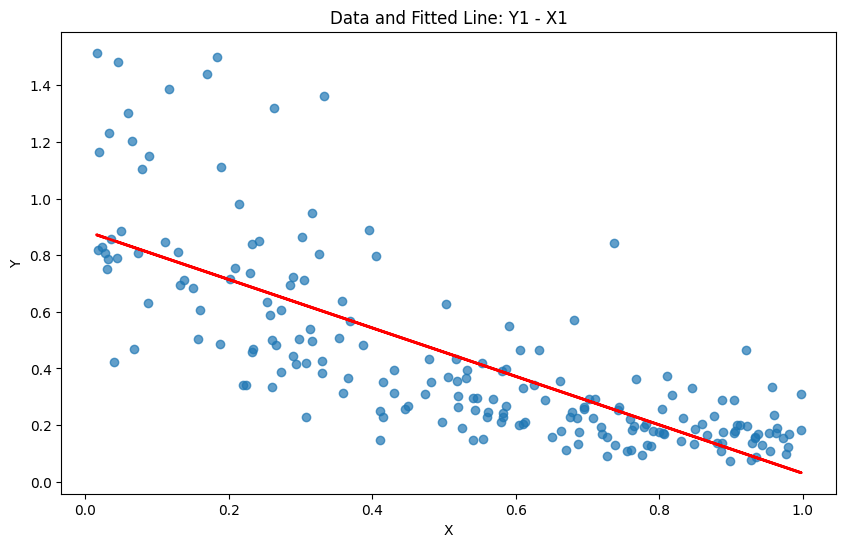


Analysis for X2 and Y2:


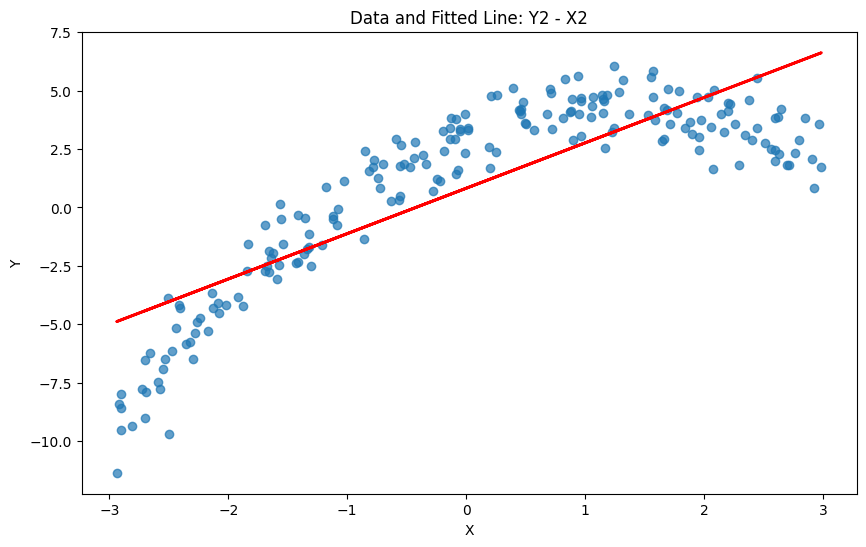


Analysis for X3 and Y3:


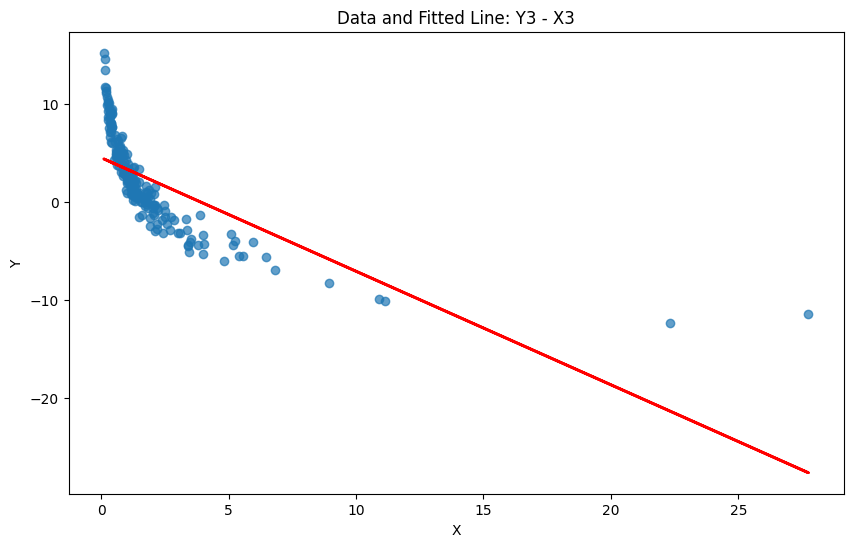


Analysis for X4 and Y4:


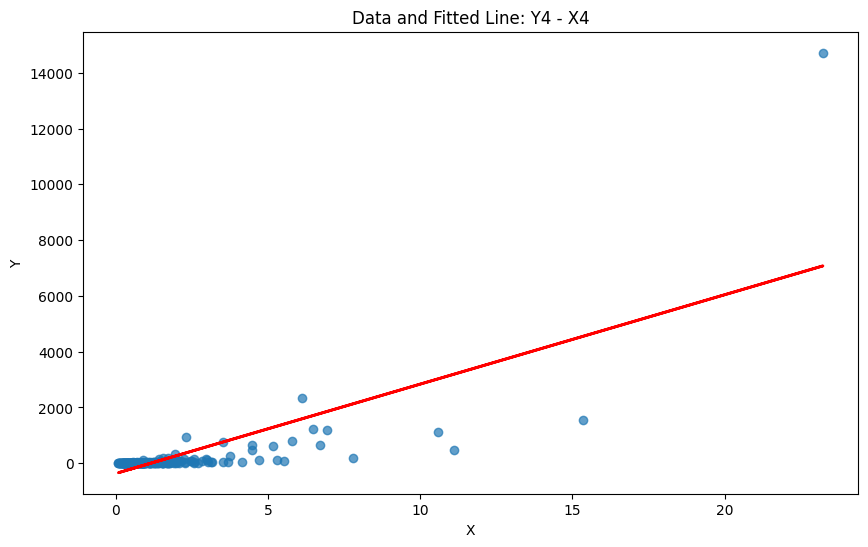

In [ ]:
for i in range(1, 5):
  x = transforms[f'X{i}']
  y = transforms[f'Y{i}']

  print(f"\nAnalysis for X{i} and Y{i}:")

  # (a) Fit linear regression and plot
  plot_regression(x, y, f'Data and Fitted Line: Y{i} - X{i}')

## (b) Provide a scatterplot, normal Q-Q plot, and histogram for the studentized regression residuals.

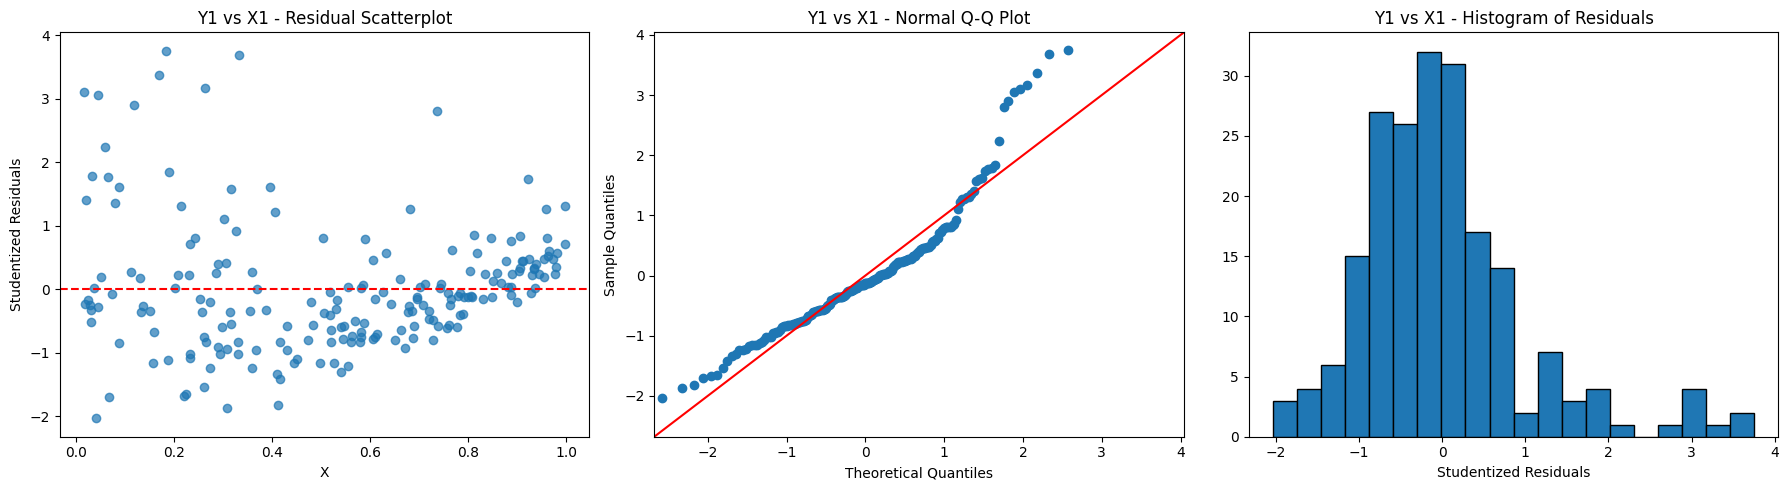

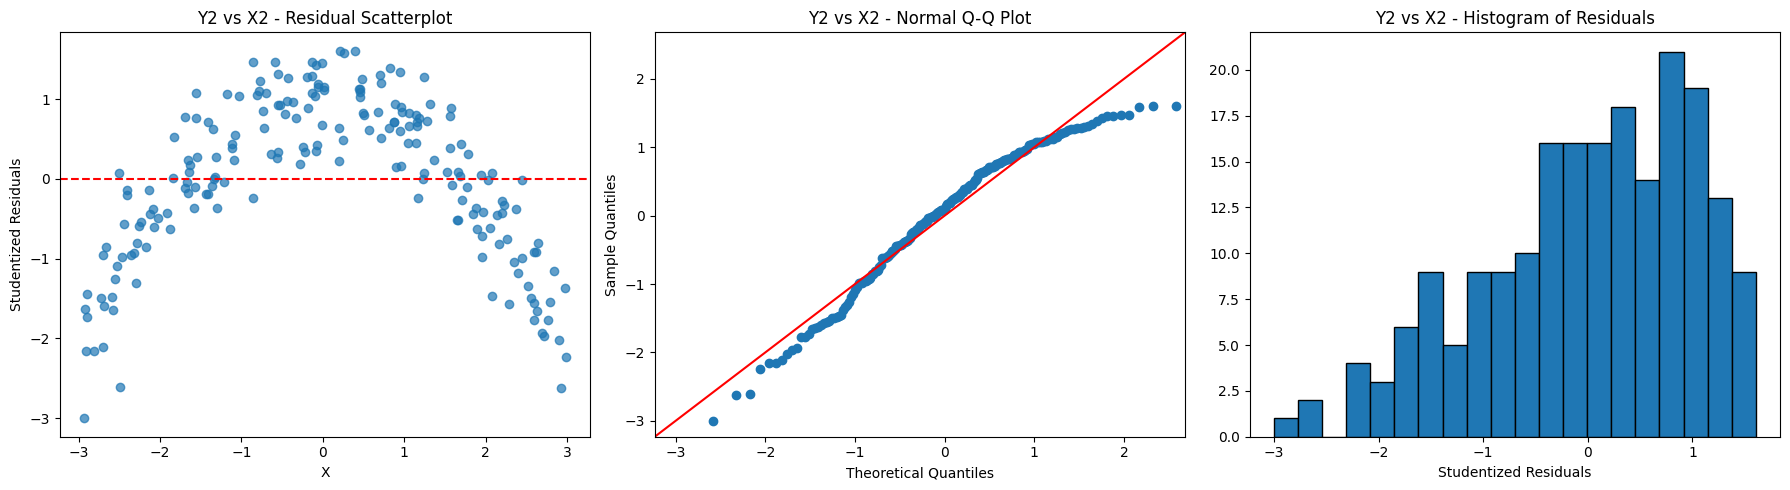

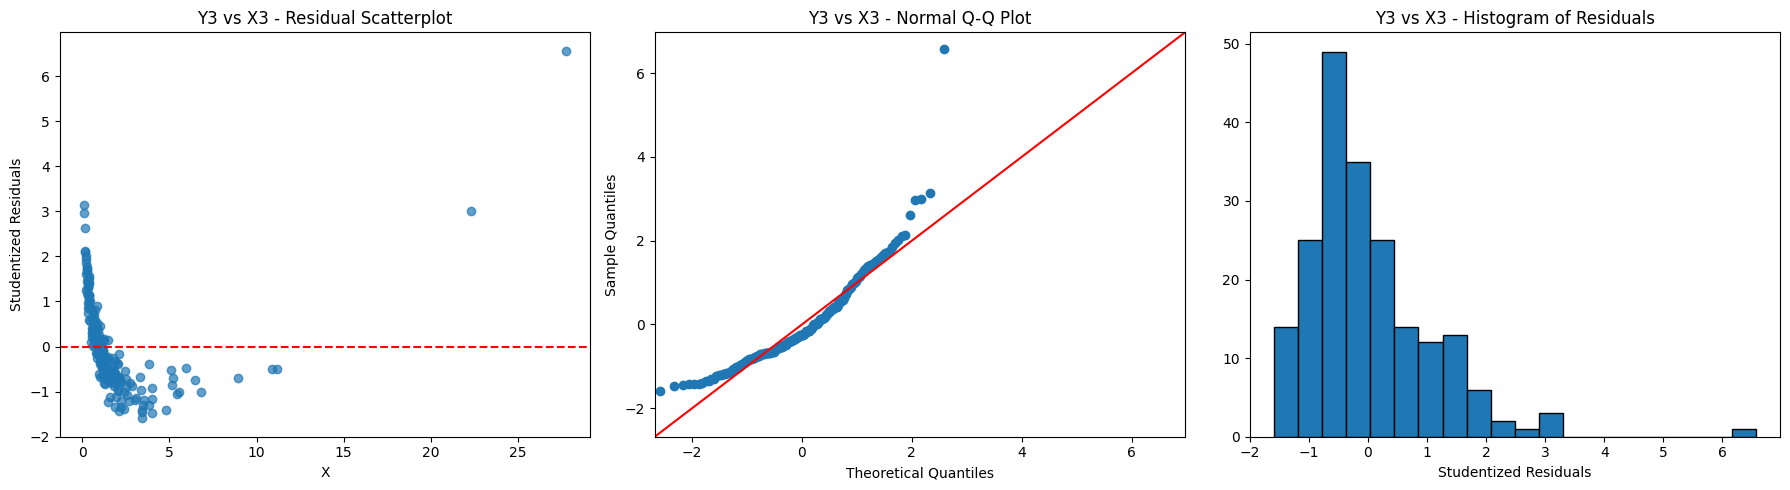

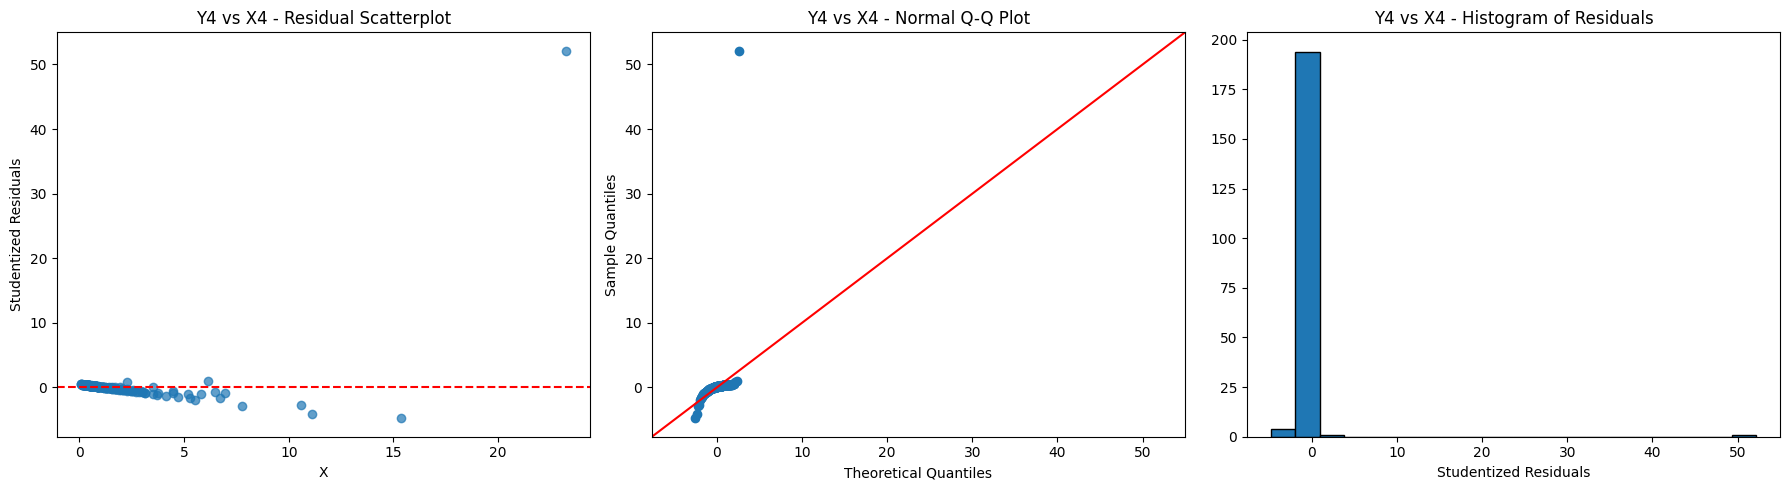

In [ ]:
# (b) Plot residual diagnostics
for i in range(1, 5):
  x = transforms[f'X{i}']
  y = transforms[f'Y{i}']

  model = smf.ols(f'Y{i} ~ X{i}', data=transforms).fit()
  plot_residuals(model, x, f'Y{i} vs X{i}')

## (c) Using the residual scatterplots, state how the SLR model assumptions are violated.

**Summary of Violations**

| **Dataset** | **Linearity** | **Homoscedasticity** | **Normality** |
|-------------|---------------|----------------------|---------------------|
| Y1 vs X1    | Satisfied     | Satisfied           | Satisfied     |
| Y2 vs X2    | Violated      | Satisfied           | Violated      |
| Y3 vs X3    | Satisfied     | Violated            | Violated      |
| Y4 vs X4    | Violated      | Violated            | Violated      |

**Y1 vs X1**

The assumptions are mostly satisfied, with a minor concern about heteroscedasticity.

- Residual Scatterplot:
  The residual scatterplot does not show any systematic pattern (e.g., U-shape or curvature) and shows a relatively random distribution of residuals around zero, but there are some signs of slight heteroscedasticity (non-constant variance) as the spread of residuals increases slightly for higher values of X1.
  
- Normal Q-Q Plot:

  The Q-Q plot shows that most points lie on the 45-degree line, but there are some deviations in the tails. This indicates that the residuals are approximately normal but may have slight non-normality in the extremes.

- Histogram of Residuals:

  The histogram appears roughly symmetric and bell-shaped, supporting the assumption of normality for residuals.


**Y2 vs X2**

There is a significant violation of linearity and normality assumptions.

- Residual Scatterplot:

  The scatterplot shows a clear U-shaped pattern in the residuals, indicating a non-linear relationship between Y2 and X2. This violates the linearity assumption.

- Normal Q-Q Plot:

  The Q-Q plot shows deviations from the 45-degree line, especially at the tails, suggesting non-normality of residuals.

- Histogram of Residuals:

  The histogram is skewed and not symmetric, further supporting the conclusion that residuals are not normally distributed.

**Y3 vs X3**

There is a clear violation of both constant variance and normality assumptions.

- Residual Scatterplot:

  The scatterplot shows a funnel shape (wider spread of residuals as X3 increases). This indicates heteroscedasticity, violating the constant variance assumption.

- Normal Q-Q Plot:

  The Q-Q plot shows significant deviations from the 45-degree line, especially in the upper tail, indicating non-normality.

- Histogram of Residuals:

  The histogram is heavily skewed to the right, confirming that residuals are not normally distributed.

**Y4 vs X4**

There are severe violations of both constant variance and normality assumptions.

- Residual Scatterplot:

  The scatterplot again shows a funnel shape, with increasing spread as X4 increases. This indicates severe heteroscedasticity, violating the constant variance assumption.

- Normal Q-Q Plot:

  The Q-Q plot shows extreme deviations from the 45-degree line, with most points far off the line, suggesting severe non-normality.

- Histogram of Residuals:

  The histogram is highly skewed and concentrated near zero, confirming that residuals are not normally distributed.

## (d) Determine the data transformation to correct the problems in (c), fit the corresponding regression model, and plot the transformed data with new fitted line.

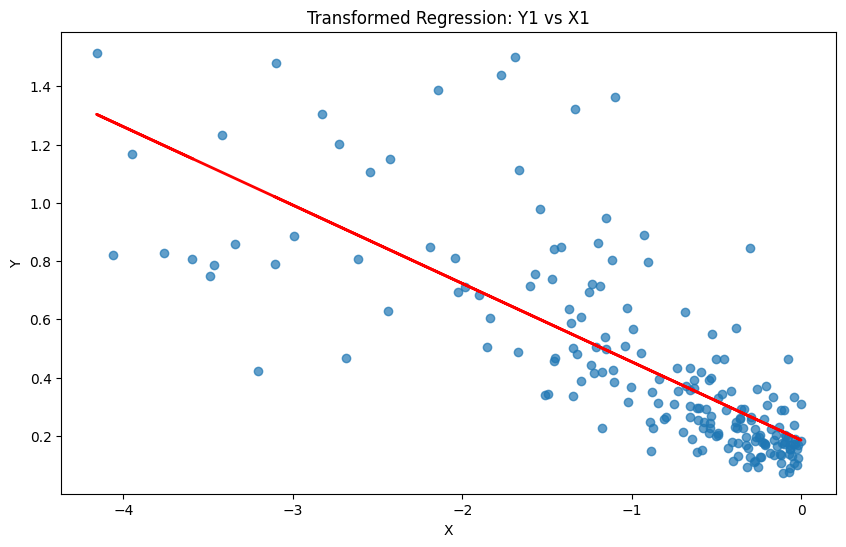

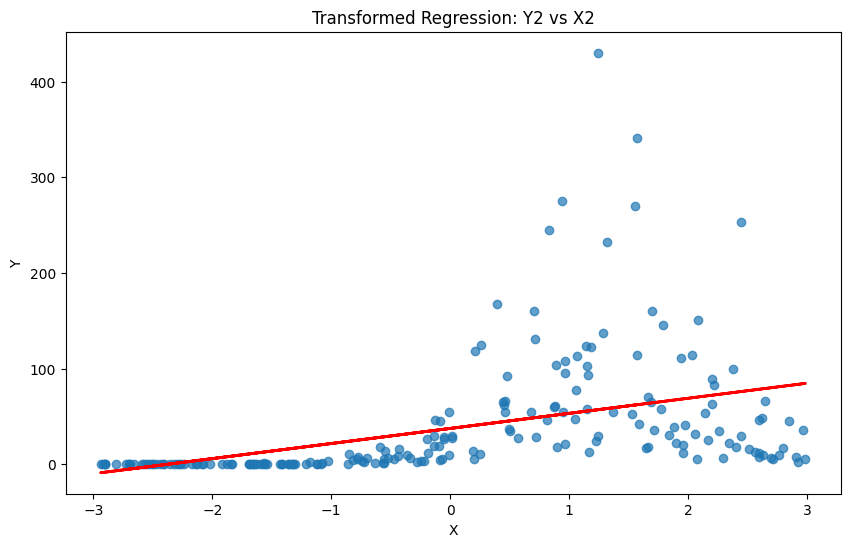

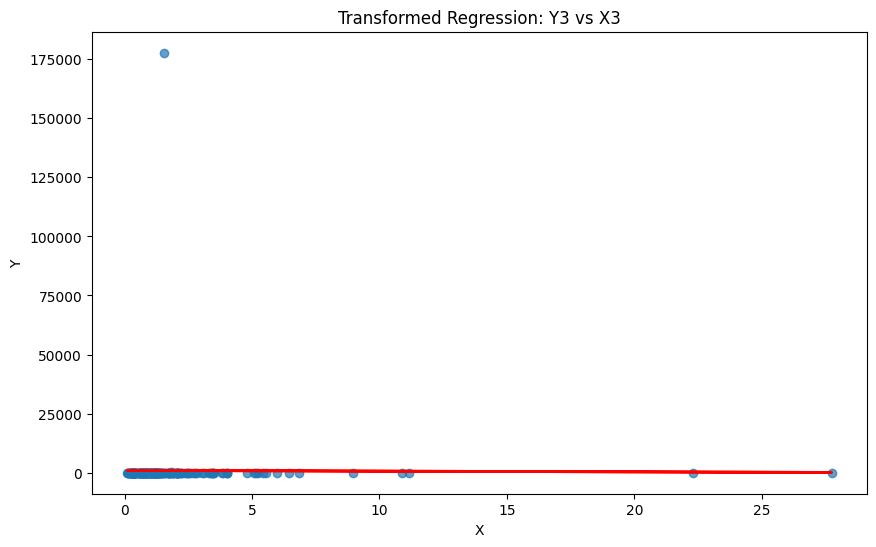

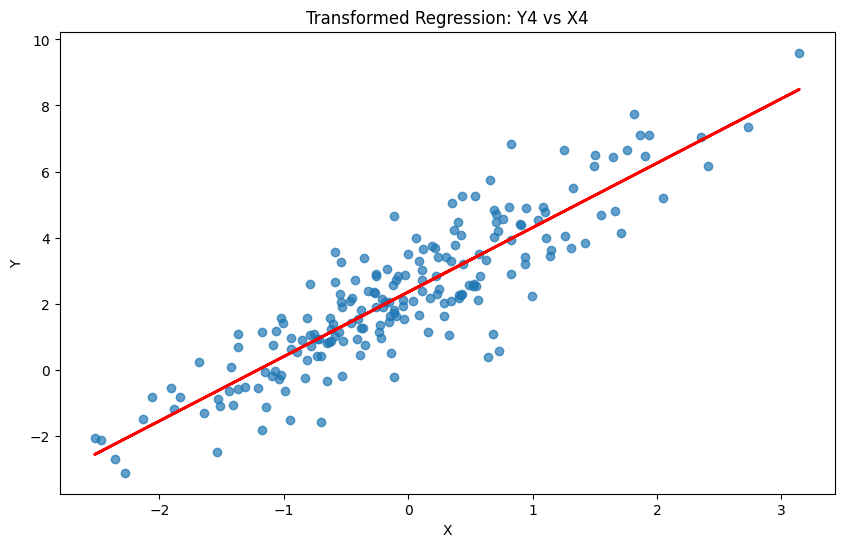

In [ ]:
# (d) Apply transformations (example transformations, may need adjustment)
for i in range(1, 5):
  x = transforms[f'X{i}']
  y = transforms[f'Y{i}']

  if i == 1:
      x_trans = np.log(x)
      y_trans = y
  elif i == 2:
      x_trans = x
      y_trans = np.exp(y)
  elif i == 3:
      x_trans = x
      y_trans = 1 / y
  else:
      x_trans = np.log(x)
      y_trans = np.log(y)

  plot_regression(x_trans, y_trans, f'Transformed Regression: Y{i} vs X{i}')

## (e) Provide plots to show that your transformations have (mostly) fixed the model violations.

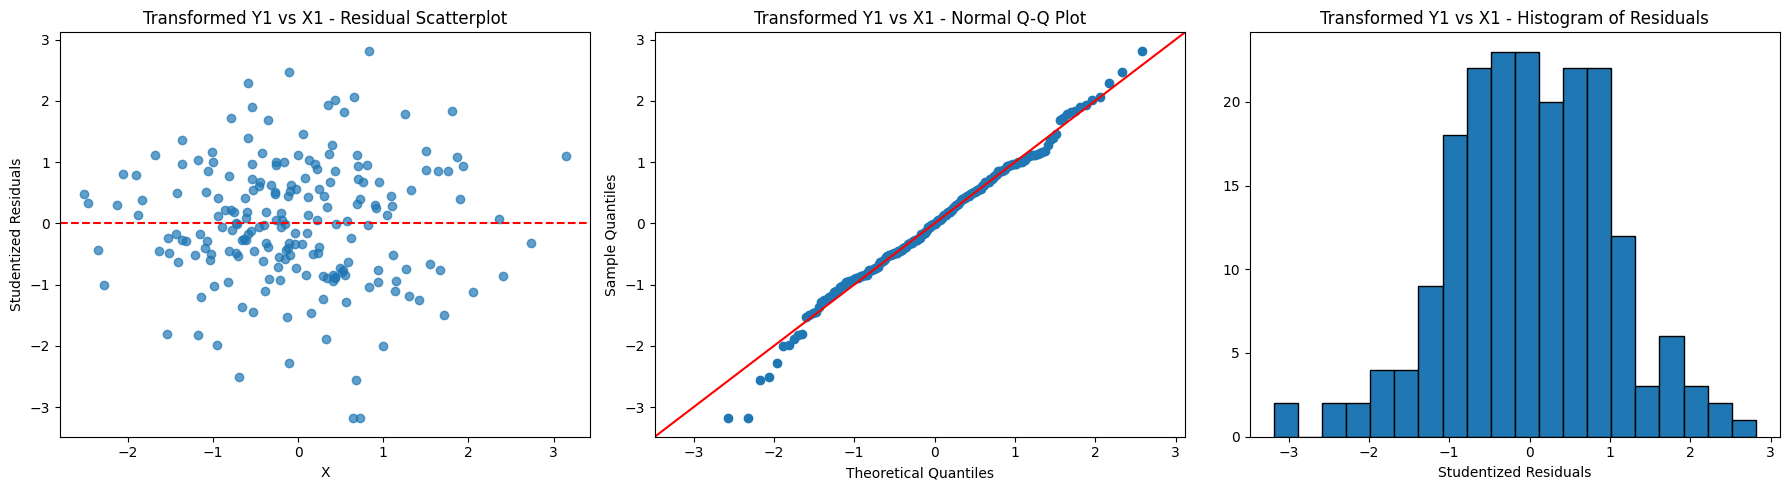

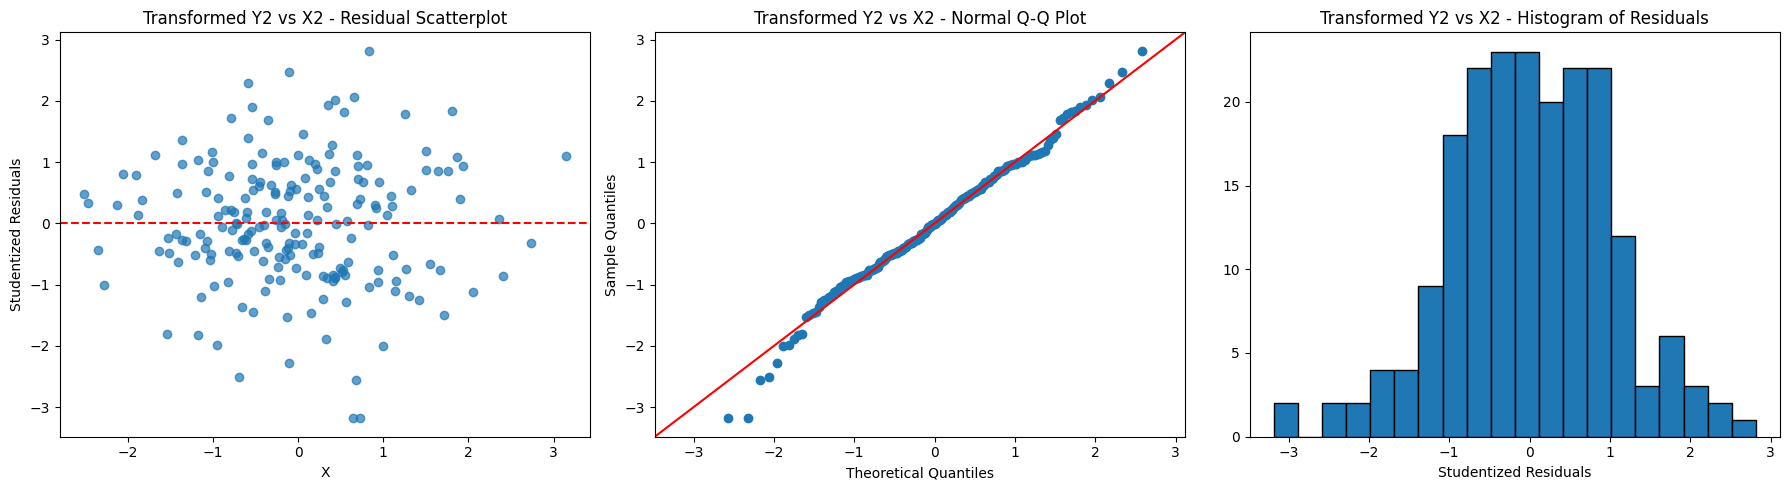

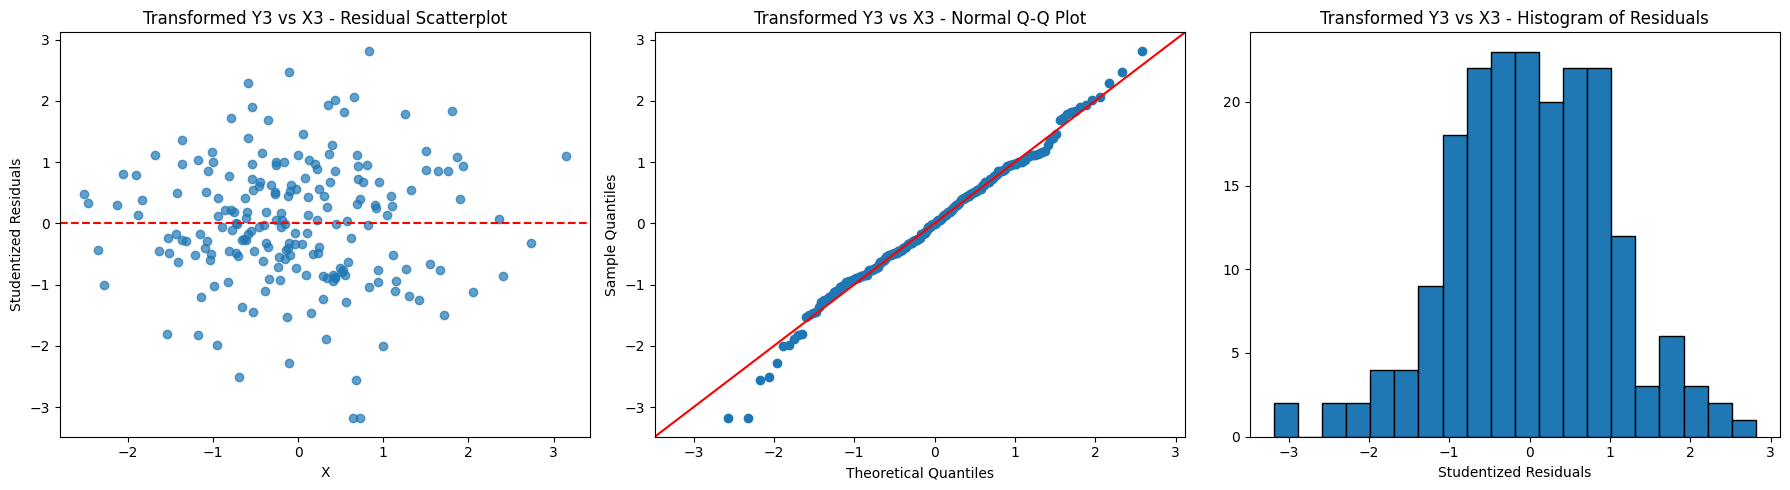

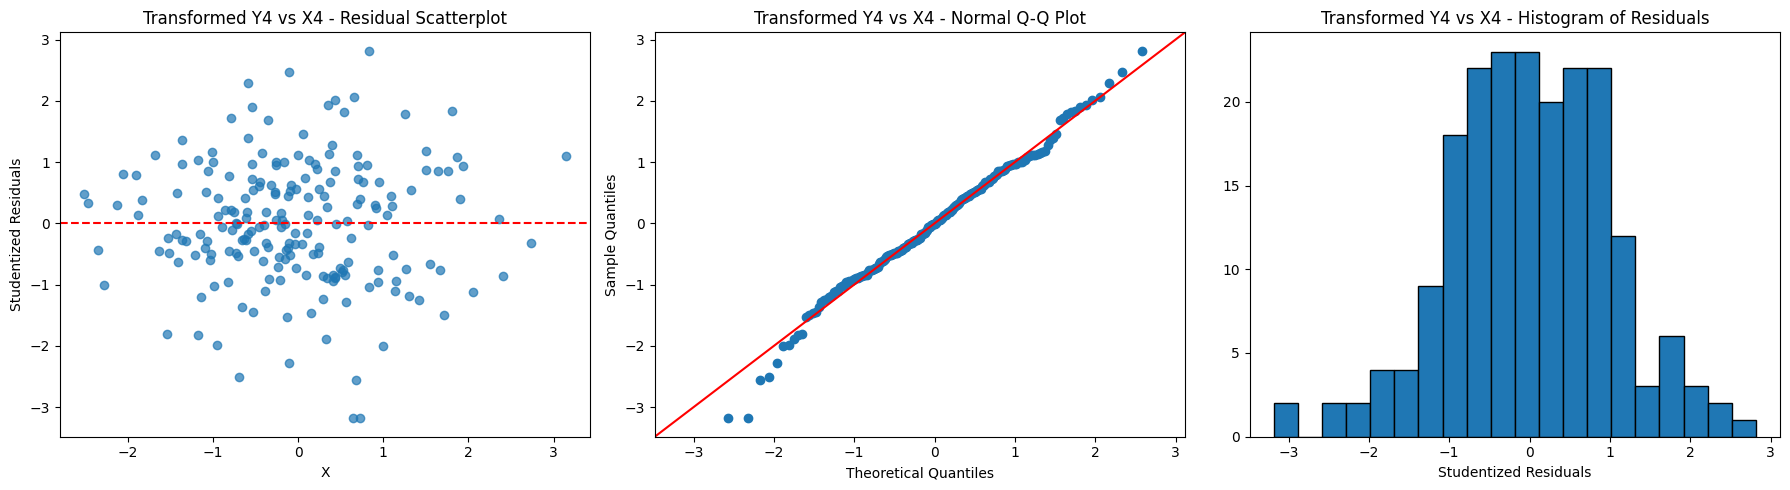

In [ ]:
# (e) Plot residuals for transformed data
for i in range(1, 5):
  x = transforms[f'X{i}']
  y = transforms[f'Y{i}']

  model_trans = smf.ols(f'y_trans ~ x_trans', data=pd.DataFrame({'x_trans': x_trans, 'y_trans': y_trans})).fit()
  plot_residuals(model_trans, x_trans, f'Transformed Y{i} vs X{i}')

# Newspaper Circulation

Data were collected on the average Sunday and daily (i.e., weekday) circulations (in thousands) for 48 of the top 50 newspapers in the United States for the period March–September, 1993. See the newspaper.csv file.

In [ ]:
newspaper = pd.read_csv("newspaper.csv")
newspaper.head()

,Sunday,daily
0,2313,1886
1,1766,1155
2,1497,1097
3,1140,816
4,928,764


## (a) Construct a scatter plot of Sunday circulation versus daily circulation. Does the plot suggest a linear relationship between the variables? Do you think this is a plausible relationship?

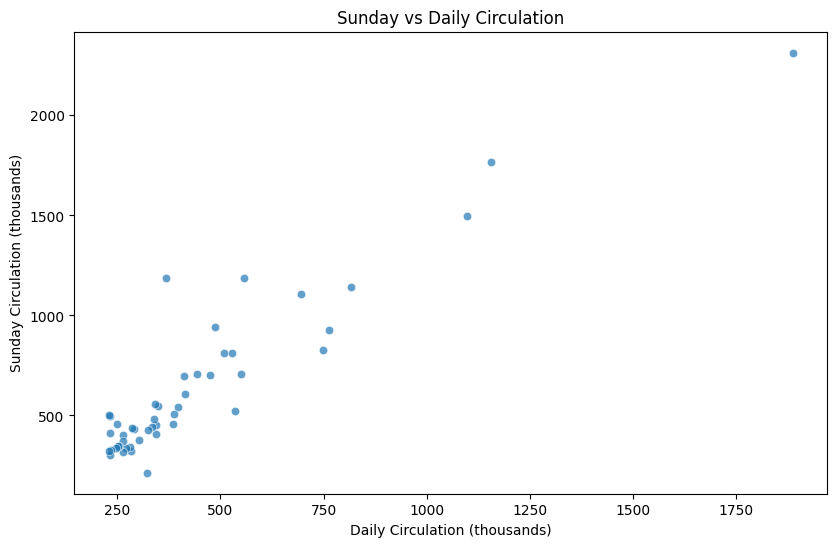

In [ ]:
# Create scatter plot
sns.scatterplot(x='daily', y='Sunday', data=newspaper, alpha=0.7)
plt.xlabel('Daily Circulation (thousands)')
plt.ylabel('Sunday Circulation (thousands)')
plt.title('Sunday vs Daily Circulation')
plt.show()

The scatter plot shows a strong positive linear relationship between Sunday and daily circulation. This relationship is plausible, as newspapers with higher weekday circulation are likely to have higher Sunday circulation as well.

## (b) Fit a regression line predicting Sunday circulation from daily circulation, and obtain 95% confidence intervals for $\beta_0$ and $\beta_1$.

In [ ]:
# Fit regression model
model_newspaper = smf.ols('Sunday ~ daily', data=newspaper).fit()

# Print summary including confidence intervals
print(model_newspaper.summary())

                            OLS Regression Results                            
Dep. Variable:                 Sunday   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     289.5
Date:                Sun, 16 Feb 2025   Prob (F-statistic):           1.78e-21
Time:                        00:39:38   Log-Likelihood:                -308.96
No. Observations:                  48   AIC:                             621.9
Df Residuals:                      46   BIC:                             625.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     76.0098     39.920      1.904      0.0

## (c) Is there a significant relationship between Sunday circulation and daily circulation? Justify your answer by a statistical test. Fully describe the test you are using, include null and alternative hypothesis, test statistic, and critical value.

In [ ]:
# Perform t-test on β1
t_stat = model_newspaper.tvalues['daily']
p_value = model_newspaper.pvalues['daily']

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: 17.015417100628653
p-value: 1.7806116138238156e-21


- Null hypothesis: There is no relationship between Sunday and daily circulation ($\beta_0$ = 0)
- Alternative hypothesis: There is a relationship between Sunday and daily circulation ($\beta_1$ ≠ 0)

The very small p-value (< 0.05) indicates strong evidence against the null hypothesis, suggesting a significant relationship between Sunday and daily circulation.

## (d) Suppose that you are proposing to add a Sunday edition of a newspaper with a weekday circulation of 225,000 copies. What would you tell advertisers is the expected Sunday circulation? What is the standard deviation of this expectation? What would you say when they ask you to predict a likely range of possible Sunday circulation numbers?

In [ ]:
# Predict Sunday circulation
daily_circulation = 225
new_newspaper = pd.DataFrame({'daily': [daily_circulation]})
prediction = model_newspaper.get_prediction(new_newspaper)

expected_sunday = prediction.predicted_mean[0]
std_error = prediction.se_mean[0]

print(f"Expected Sunday circulation: {expected_sunday:.2f} thousand")
print(f"Standard error of expectation: {std_error:.2f} thousand")

# Prediction interval
pred_interval = prediction.conf_int(alpha=0.05)
print(f"95% prediction interval: ({pred_interval[0][0]:.2f}, {pred_interval[0][1]:.2f}) thousand")

Expected Sunday circulation: 363.26 thousand
Standard error of expectation: 27.57 thousand
95% prediction interval: (307.77, 418.76) thousand


 There is a 95% chance that Sunday circulation will fall between 307.77 and 418.76 thousand for a newspaper with a weekday circulation of 225,000 copies.

## (e) Argue that working with the logarithm of the circulation(s) might be better than using the raw numbers. Fit the corresponding log-log regression model. Compare and contrast the fit and the predictive interval obtained for the Sunday edition of a newspaper with a weekly circulation of 225,000 copies.

In [ ]:
# Add log columns
newspaper['log_daily'] = np.log(newspaper['daily'])
newspaper['log_sunday'] = np.log(newspaper['Sunday'])

# Fit log-log model
model_newspaper_log = smf.ols('log_Sunday ~ log_daily', data=newspaper).fit()
print(model_newspaper_log.summary())

# Predict for 225,000 daily circulation
new_newspaper_log = pd.DataFrame({'log_daily': [np.log(daily_circulation)]})
log_prediction = model_newspaper_log.get_prediction(new_newspaper_log)
log_expected = log_prediction.predicted_mean[0]
log_interval = log_prediction.conf_int(alpha=0.05)

print(f"\nLog-log model:")
print(f"Expected Sunday circulation: {np.exp(log_expected):.0f} thousand")
print(f"95% prediction interval: ({np.exp(log_interval[0][0]):.0f}, {np.exp(log_interval[0][1]):.0f}) thousand")

                            OLS Regression Results                            
Dep. Variable:             log_Sunday   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     174.2
Date:                Sun, 16 Feb 2025   Prob (F-statistic):           2.98e-17
Time:                        00:46:05   Log-Likelihood:                 2.0020
No. Observations:                  48   AIC:                         -0.004042
Df Residuals:                      46   BIC:                             3.738
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6269      0.432      1.450      0.1

1. **Argument for Using Logarithms**: Using the logarithm of the circulation variables (log_Sunday and log_daily) instead of raw numbers has several advantages
  - Variance Stabilization: Logarithmic transformations reduce the impact of extreme values, stabilizing variance and minimizing heteroscedasticity. This is particularly useful when dealing with large ranges in values, as seen in the circulation data.
  - Linearizing Relationships: A log-log transformation often linearizes relationships that are multiplicative in nature, making them more suitable for linear regression.
  - Interpretability: In a log-log model, the slope coefficient represents elasticity, i.e., the percentage change in Sunday circulation for a 1% change in daily circulation. This interpretation is intuitive and useful.

2. **Comparison to Raw Data Model**: The log-log model provides a better fit due to its ability to stabilize variance and linearize relationships, making it more robust for prediction and interpretation. For advertisers, this model offers a clear understanding of how changes in daily circulation impact Sunday circulation on a percentage basis.

  - Model Equation: log(Sunday) = 0.6269 + 0.9554⋅log(daily)
  - The log-log model likely performs better than the raw data model due to its ability to handle non-linearity and heteroscedasticity.
  - The R-squared value of 0.791 indicates a strong fit, though it might be slightly lower than that of the raw data model if it overfits.
  - Prediction for Daily Circulation = 225,000 Copies
    - log(Sunday) = 0.6269 + 0.9554⋅log(daily)
    - log(Sunday) = 0.6269 + 0.9554⋅log(225)
    - log(Sunday) = 0.6269 + 0.9554⋅5.416 ≈ 5.796
    - Sunday ≈ 330,000